In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
categorical_column = ['Geography', 'Gender']
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit on training data & transform both train and test sets
X_train_ohe = ohe.fit_transform(X_train[categorical_column])
X_test_ohe = ohe.transform(X_test[categorical_column])

# Convert encoded arrays to DataFrames with correct column names
ohe_columns = ohe.get_feature_names_out(categorical_column)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_columns, index=X_test.index)

# Step 3: Drop Original Categorical Columns
X_train = X_train.drop(columns=categorical_column)
X_test = X_test.drop(columns=categorical_column)

# Step 4: Concatenate Encoded Columns Back
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

In [15]:
# Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(11, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6301 - loss: 0.6289 - val_accuracy: 0.8000 - val_loss: 0.4716
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7982 - loss: 0.4613 - val_accuracy: 0.8000 - val_loss: 0.4452
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7900 - loss: 0.4520 - val_accuracy: 0.8112 - val_loss: 0.4342
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8069 - loss: 0.4244 - val_accuracy: 0.8269 - val_loss: 0.4221
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8183 - loss: 0.4190 - val_accuracy: 0.8363 - val_loss: 0.4085
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8309 - loss: 0.3911 - val_accuracy: 0.8475 - val_loss: 0.3934
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8402 - loss: 0.3816 - val_accuracy: 0.8537 - val_loss: 0.3801
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8530 - loss: 0.3649 - val_a

In [23]:
model.layers[1].get_weights()

[array([[ 0.5281977 , -0.11247419,  0.44360092,  0.3948452 , -0.19559278,
         -0.75329924, -0.00256099,  0.6199998 , -0.48175973,  0.49460492,
          0.52972096],
        [ 0.6024986 , -0.45297244,  0.02299435, -0.46249446,  0.13730116,
          0.32232824, -0.34897214,  0.19619073,  0.06990083,  0.385343  ,
         -0.6344913 ],
        [-0.47654206, -0.2610558 ,  0.26884404,  0.08801799,  0.05696456,
          0.38403308,  0.5207081 , -0.5195449 ,  0.61557364, -0.80517673,
          0.2755362 ],
        [ 0.4578532 ,  0.6402317 , -0.86995864,  0.10271242,  0.08797622,
         -0.81360644, -0.4055126 ,  0.2531608 ,  0.01431179,  0.23606552,
         -0.056872  ],
        [ 0.6008304 ,  0.10295857, -0.9450179 , -0.30433494,  0.4018473 ,
          0.9008296 ,  0.5906193 ,  0.3000576 , -0.00262563,  0.22412364,
         -0.29158777],
        [-0.7957251 , -0.9793843 ,  1.1678401 , -0.24136885, -0.25069904,
          0.22089727, -0.10975641, -0.28495115, -0.34688917,  0.6232679

In [24]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
y_pred = np.where(y_log>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8635

In [27]:
import matplotlib.pyplot as plt

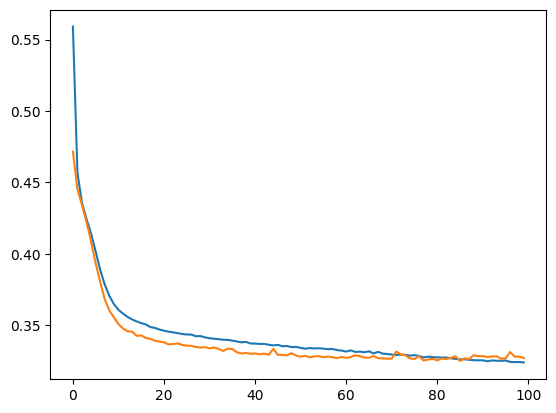

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

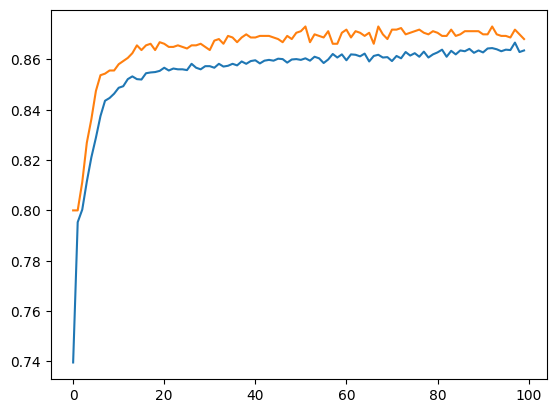

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()